In [299]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [426]:
class Markov_Chain_Sim():
    def __init__(self, name_list=['X','Y']):
        """
        """
        initial_state=[[1]]*len(name_list) 
        self.current_state = np.array(initial_state)
        self.update_matrix = np.identity(len(initial_state))
        self.name_to_index = {x:i for i,x in enumerate(name_list)}
        self.G = nx.MultiDiGraph()
        #Table 2 from https://link.springer.com/content/pdf/10.1007/BF00392763.pdf
        self.parameters = np.zeros((len(initial_state),len(initial_state))) 
            
    def modify_update_matrix(self, name_start, name_end, p):
        i_start = self.name_to_index[name_start]
        i_end = self.name_to_index[name_end]
        self.update_matrix[i_end][i_start] = p
        #Make sure the conservation in the column: 
        #self.update_matrix[i_start][i_start] = self.update_matrix[i_start][i_start]-p
        col_values = self.update_matrix[:,i_start]
        if np.sum(col_values) != 1:
            self.update_matrix[i_start][i_start] = 1 - np.sum([col_values[i] for i in range(len(col_values)) if i!=i_start])
    
    def update_current_state(self):
        self.current_state = np.matmul(self.update_matrix,self.current_state)
        
    def display_markov_chain(self, node_size=2000, fig_name='None', nodelist='all', figsize=(8,6)):
        #Modified from https://vknight.org/unpeudemath/code/2015/11/15/Visualising-markov-chains.html
        G = nx.MultiDiGraph()
        labels={}
        edge_labels={}
        states = list(self.name_to_index.keys())

        for i, origin_state in enumerate(states):
            for j, destination_state in enumerate(states):
                rate = self.update_matrix[j][i]
                if rate > 0 and origin_state!=destination_state:
                    G.add_edge(origin_state,
                               destination_state,
                               weight=rate,
                               label="{:.02f}".format(rate))
                    edge_labels[(origin_state, destination_state)] = label="{:.02f}".format(rate)
        if nodelist=='all':
            nodelist=list(G)
        fig, ax = plt.subplots(figsize=figsize)
        pos = nx.shell_layout(G)
        
        nx.draw_networkx_nodes(G, pos=pos, ax=ax, nodelist=nodelist,
                               node_size=node_size, node_shape='o')
        nx.draw_networkx_labels(G, pos=pos, labels={x:x for x in nodelist})
        nx.draw_networkx_edges(
            G, pos=pos, width=3,
            edge_color = [G.edges[edge]['weight'] for edge in G.edges], edge_cmap = plt.cm.binary,
            connectionstyle="arc3,rad=0.2", arrows=True,
            arrowsize=20, node_size=node_size, 
            ax=ax
        )
        #nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)
        ax.axis('off')
        if fig_name!='None':
            fig.savefig(f'Results/{fig_name}.png')
            
    def update_node(self, node_name, resource_name_list):
        """
        source: equation 1 from https://link.springer.com/content/pdf/10.1007/BF00392763.pdf
        i: resource; j: predator (i->j)
        NOT COMPLETE, STUCK, MAY NOT NECCESSARY
        """
        j = self.name_to_index[node_name]
        resource_index_list = [self.name_to_index[resource_name] for resource_name in resource_name_list]
        
        resource_component = np.sum([self.parameters['pi'][j][i] for i in resource_index_list])

{'X': 0, 'Y': 1, 'Z': 2}
[[0.58 0.1  0.25]
 [0.3  0.75 0.1 ]
 [0.12 0.15 0.65]]


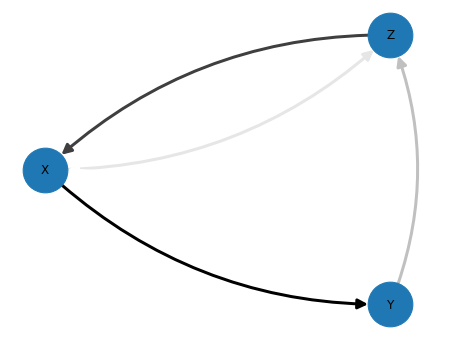

In [427]:
sim = Markov_Chain_Sim(name_list=['X','Y','Z'])
print(sim.name_to_index)

##x_to_y:0.3, 
sim.modify_update_matrix(name_start='X', name_end='Y', p=0.3)
##y_to_x: 0.1
sim.modify_update_matrix(name_start='Y', name_end='X', p=0.1)

sim.modify_update_matrix(name_start='Y', name_end='Z', p=0.15)
sim.modify_update_matrix(name_start='Z', name_end='Y', p=0.1)

sim.modify_update_matrix(name_start='X', name_end='Z', p=0.12)
sim.modify_update_matrix(name_start='Z', name_end='X', p=0.25)

print(sim.update_matrix)
sim.display_markov_chain(fig_name='simple_3_box_model')

In [424]:
col_values = sim.update_matrix[:,0]
col_values

array([0.58, 0.3 , 0.12])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


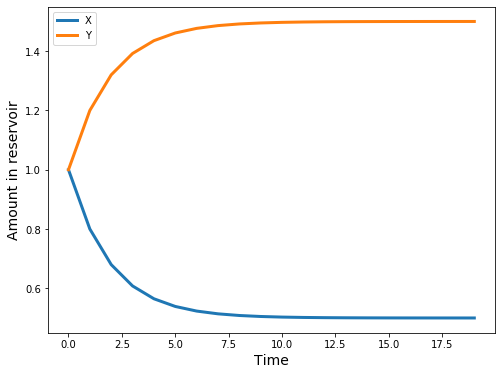

In [275]:
sim = Markov_Chain_Sim(name_list=['X','Y'])
sim.modify_update_matrix(name_start='X', name_end='Y', p=0.3)
sim.modify_update_matrix(name_start='Y', name_end='X', p=0.1)
all_states = []
time_range=20
for _ in range(time_range):
    all_states.append(sim.current_state)
    sim.update_current_state()
fig, ax = plt.subplots(figsize=(8,6))
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('Amount in reservoir', fontsize=14)

for node in sim.name_to_index.keys():
    ax.plot(range(time_range), [states[sim.name_to_index[node]][0] for states in all_states], 
            label=node, linewidth=3)
ax.legend()
fig.show()

## Replicate box model from paper: 

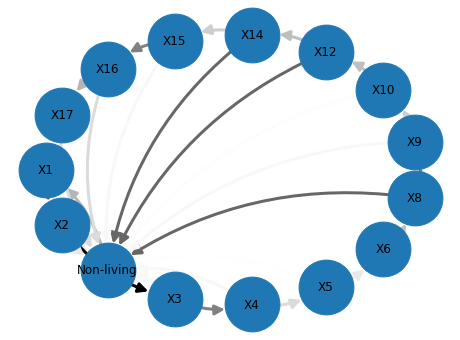

In [435]:
name_list = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8', 'X9', 'X10', 'X12', 'X14', 'X15', 'X16', 'X17']
### Assume all non-living (X7, X11, X13) as one single category:
name_list.append('Non-living')
sim = Markov_Chain_Sim(name_list=name_list)
sim.modify_update_matrix(name_start='Non-living', name_end='X1', p=1.96)
sim.modify_update_matrix(name_start='X1', name_end='X2', p=2.65)
sim.modify_update_matrix(name_start='X2', name_end='X3', p=1)
sim.modify_update_matrix(name_start='X3', name_end='X4', p=0.5)
sim.modify_update_matrix(name_start='X4', name_end='X5', p=0.15)
sim.modify_update_matrix(name_start='X5', name_end='X6', p=0.1)
sim.modify_update_matrix(name_start='X6', name_end='X8', p=6.26)
sim.modify_update_matrix(name_start='X8', name_end='X9', p=0.55)
sim.modify_update_matrix(name_start='X9', name_end='X10', p=0.2)
sim.modify_update_matrix(name_start='X10', name_end='X12', p=6.26)
sim.modify_update_matrix(name_start='X12', name_end='X14', p=6.26)
sim.modify_update_matrix(name_start='X14', name_end='X15', p=1.2)
sim.modify_update_matrix(name_start='X15', name_end='X16', p=2.5)
sim.modify_update_matrix(name_start='X16', name_end='X17', p=1.3)


biotic_list = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8', 'X9', 'X10', 'X12', 'X14', 'X15', 'X16', 'X17']
rho_list = [0.1, 0.1, 0.04, 0.038, 0.015, 0.01, 0.6, 0.04, 0.02, 0.6, 0.6, 0.038, 0.15, 0.15]
for name_start, p in zip(biotic_list, rho_list):
    sim.modify_update_matrix(name_start=name_start, name_end='Non-living', p=p)
#Update the one that have p greater than 1:
sim.modify_update_matrix(name_start='Non-living', name_end='X1', p=0.3)
sim.modify_update_matrix(name_start='X1', name_end='X2', p=0.65)
sim.modify_update_matrix(name_start='X6', name_end='X8', p=0.26)
sim.modify_update_matrix(name_start='X10', name_end='X12', p=0.26)
sim.modify_update_matrix(name_start='X12', name_end='X14', p=0.26)
sim.modify_update_matrix(name_start='X14', name_end='X15', p=0.2)
sim.modify_update_matrix(name_start='X15', name_end='X16', p=0.5)
sim.modify_update_matrix(name_start='X16', name_end='X17', p=0.3)

sim.display_markov_chain(node_size=3000, figsize=(8,6), fig_name='Repl')

In [436]:
all_states = []
time_range=100
for _ in range(time_range):
    all_states.append(sim.current_state)
    sim.update_current_state()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


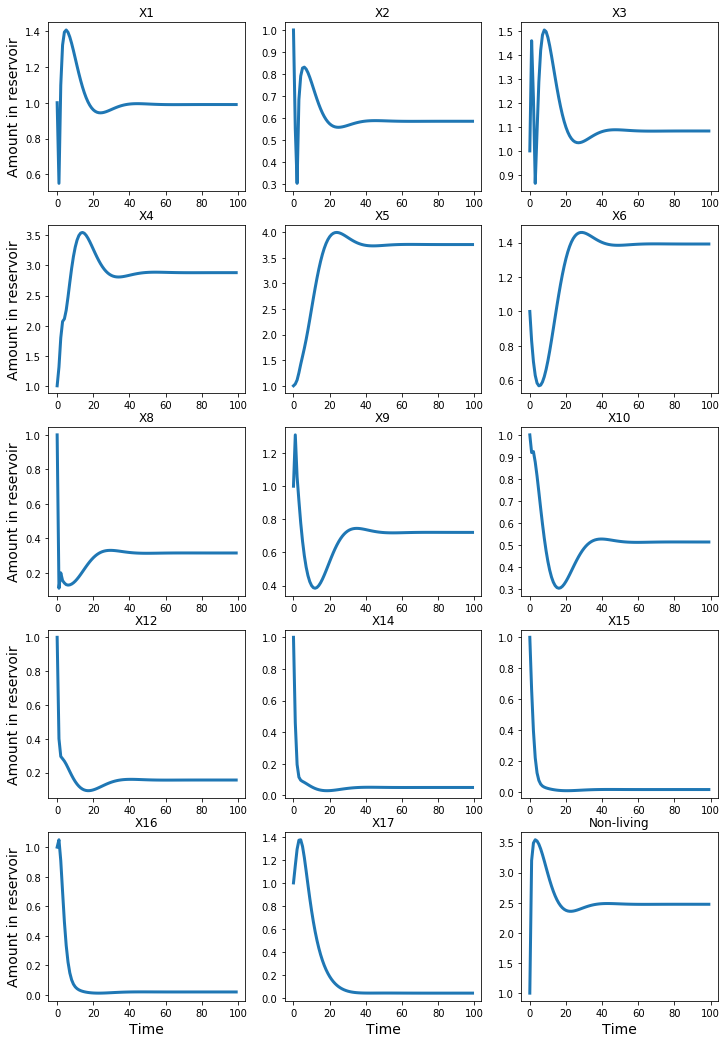

In [437]:
fig, axes = plt.subplots(ncols=3, nrows=5, figsize=(12,18))
axes = axes.flatten()

for i, node in enumerate(biotic_list + ['Non-living']):
    ax = axes[i]
    if i%3 == 0:
        ax.set_ylabel('Amount in reservoir', fontsize=14)
    if i==14 or i==13 or i==12:
        ax.set_xlabel('Time', fontsize=14)
    ax.set_title(node)
    ax.plot(range(time_range), [states[sim.name_to_index[node]][0] for states in all_states], 
            linewidth=3)

fig.show()

In [439]:
np.linalg.eigvals(sim.update_matrix)

array([-0.16152978+0.j        ,  0.01705884+0.0549034j ,
        0.01705884-0.0549034j ,  0.16347751+0.0899158j ,
        0.16347751-0.0899158j ,  1.        +0.j        ,
        0.8852045 +0.13725782j,  0.8852045 -0.13725782j,
        0.48504319+0.18917275j,  0.48504319-0.18917275j,
        0.73156051+0.17555394j,  0.73156051-0.17555394j,
        0.83510744+0.j        ,  0.48073323+0.j        ,
        0.55      +0.j        ])